<a href="https://colab.research.google.com/github/prxrwx/Stat-learning-for-datasci/blob/main/ACF%26PACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**ใช้ราคาปิด (Close)**

1. จงแสดงแผนภาพ ACF และ PACF ของข้อมูล**ก่อน**การแปลง พร้อมกับอธิบายว่าข้อมูลนี้มี trend หรือ seasonality หรือไม่โดยใช้แผนภาพเหล่านี้ประกอบ
2. จงแปลงข้อมูลให้เป็น stationary โดยใช้ ADF test และ KPSS test ในการทดสอบ
3. จงแสดงแผนภาพ ACF และ PACF ของข้อมูล**หลัง**การแปลง พร้อมกับอธิบายว่าข้อมูลนี้มี trend หรือ seasonality หรือไม่โดยใช้แผนภาพเหล่านี้ประกอบ

In [ ]:
!pip install wget

!python -m wget -o google.csv http://www.donlapark.cmustat.com/229351/data/google.csv

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=cd299c23a0726a5bc1c3c153a68c5ae50a7e4f0008a267d66e249c78a0067d24
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

Saved under google.csv


In [ ]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

parser("2020-02-01")

datetime.datetime(2020, 2, 1, 0, 0)

In [ ]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('google.csv', parse_dates=['Date'], 
                                        index_col='Date',
                                        date_parser=parser)

print (data.head())

print (data.dtypes)

              Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object


In [ ]:
ts = data['Close']

print(ts)

Date
2006-01-03     217.83
2006-01-04     222.84
2006-01-05     225.85
2006-01-06     233.06
2006-01-09     233.68
               ...   
2017-12-22    1068.86
2017-12-26    1065.85
2017-12-27    1060.20
2017-12-28    1055.95
2017-12-29    1053.40
Name: Close, Length: 3019, dtype: float64


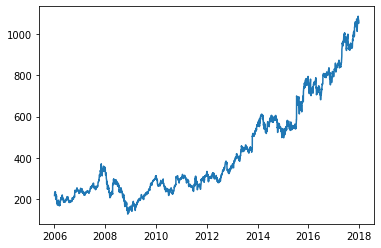

In [ ]:
plt.plot(ts)

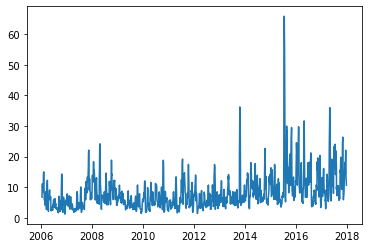

In [ ]:
roll_std = ts.rolling(window=12).std()
plt.plot(roll_std, label = 'Rolling Std');

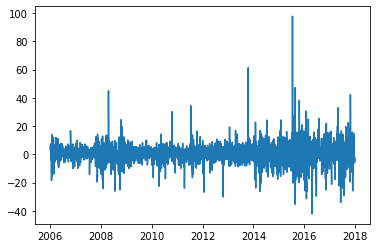

In [ ]:
plt.plot(ts-ts.shift());

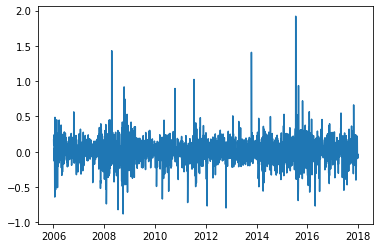

In [ ]:
ts_log = ts**0.5
plt.plot(ts_log-ts_log.shift());

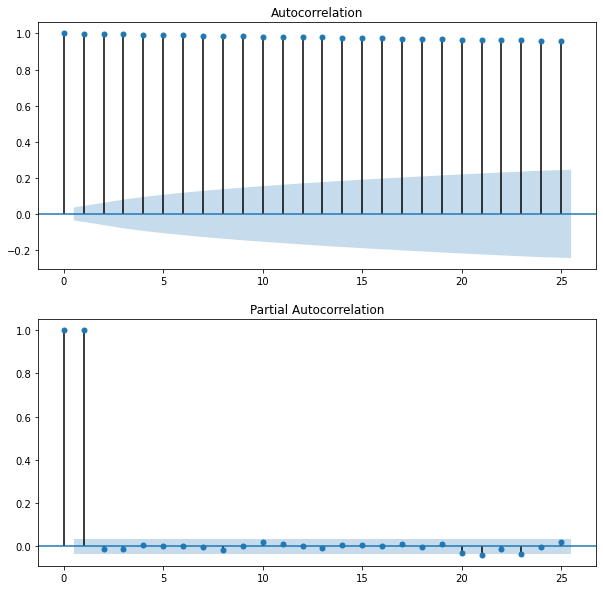

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1,figsize=(10, 10))
plot_acf(ts, lags=25, ax=ax[0]);
plot_pacf(ts, lags=25, ax=ax[1]);

จงแสดงแผนภาพ ACF พบว่าข้อมูลก่อนการแปลงมี trend

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def KPSStest(timeseries):
  kpsstest = kpss(timeseries, lags='auto')
  print('KPSS test')
  print('Test Statistic: ',kpsstest[0])
  print('p-value: ',kpsstest[1])
  print('Number of Observations Used: ',kpsstest[2])
  print('Critical Values: ',kpsstest[3])

def ADFtest(timeseries):
  adftest = adfuller(timeseries)
  print('ADF test')
  print('Test Statistic: ',adftest[0])
  print('p-value: ',adftest[1])
  print('#Lags Used: ',adftest[2])
  print('Number of Observations Used: ',adftest[3])
  print('Critical Values: ',adftest[4])


KPSStest(ts)
ADFtest(ts)

KPSS test
Test Statistic:  7.822428945107422
p-value:  0.01
Number of Observations Used:  32
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  1.3224241360302182
p-value:  0.9967315857800989
#Lags Used:  29
Number of Observations Used:  2989
Critical Values:  {'1%': -3.4325396703967974, '5%': -2.862507454335551, '10%': -2.5672850015989264}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


จาก ADF test พบว่าข้อมูลยังไม่เป็น stationary เนื่องจากค่าสถิติไม่น้อยกว่า CR

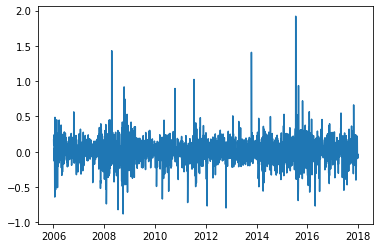

In [ ]:
ts_log_diff = ts_log - ts_log.shift() #y_(t)-y_(t-1)

plt.plot(ts_log_diff);

In [ ]:
ts_log_diff.dropna(inplace=True)
ts_log_diff

Date
2006-01-04    0.168761
2006-01-05    0.100480
2006-01-06    0.237996
2006-01-09    0.020293
2006-01-10    0.046702
                ...   
2017-12-22   -0.030420
2017-12-26   -0.046066
2017-12-27   -0.086646
2017-12-28   -0.065328
2017-12-29   -0.039260
Name: Close, Length: 3018, dtype: float64

In [ ]:
KPSStest(ts_log_diff)
ADFtest(ts_log_diff)

KPSS test
Test Statistic:  0.21613192324011715
p-value:  0.1
Number of Observations Used:  5
Critical Values:  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
ADF test
Test Statistic:  -54.35535774607188
p-value:  0.0
#Lags Used:  0
Number of Observations Used:  3017
Critical Values:  {'1%': -3.4325193312999036, '5%': -2.8624984712561274, '10%': -2.567280219110819}


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


จากการทดสอบพบว่าข้อมูลมีลักษณะเป็น stationary แล้ว

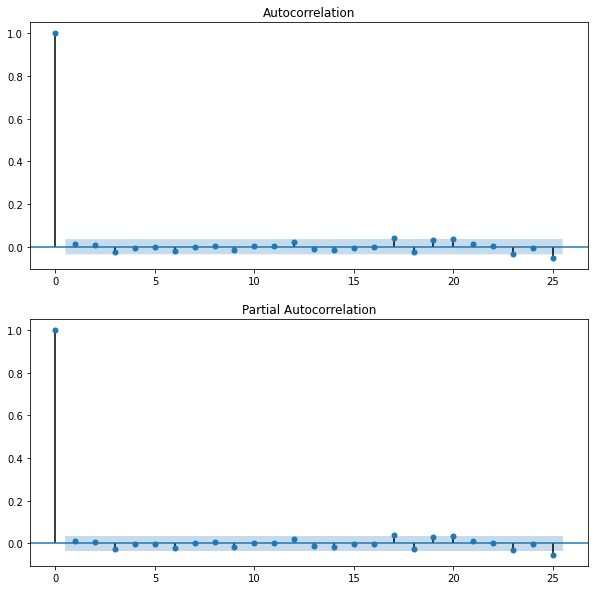

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2,1,figsize=(10, 10))
plot_acf(ts_log_diff, lags=25, ax=ax[0]);
plot_pacf(ts_log_diff, lags=25, ax=ax[1]);

จาก ACF และ PACF พบว่าข้อมูลมีลักษณะเป็น stationary แล้ว ไม่มี trend และ sesonal